In [2]:
import pandas as pd
import numpy as np
import os 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
df = pd.read_csv('rain.csv')

In [16]:
df = df.replace('--', 0)

# Convert specific columns to numeric, excluding 'Date'
numeric_columns = df.columns[df.columns != 'Date']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [24]:
df.dropna(inplace =True)

In [26]:
df

,Date,STN1126,STN0472,STN1094,STN1089,STN0171,STN0680,STN0679,STN1074,STN1075,STN1015,STN1415,STN1181,STN0481,STN1434,T12A,T7
0,1-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,27-10-23,0.0,0.0,2.0,0.0,1.0,5.5,0.0,0.0,1.0,30.0,13.0,2.0,0.5,0.0,0.0,0.0
3952,28-10-23,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,3.5,0.0,51.5,51.5
3953,29-10-23,35.5,0.0,117.0,44.0,66.5,14.5,32.0,46.0,0.0,29.5,7.5,0.5,0.0,0.0,0.0,0.0
3954,30-10-23,0.5,0.0,0.0,9.5,0.0,1.0,0.0,9.0,0.0,2.0,2.0,1.5,13.5,0.0,4.2,4.2


In [30]:
df.describe()

,STN1126,STN0472,STN1094,STN1089,STN0171,STN0680,STN0679,STN1074,STN1075,STN1015,STN1415,STN1181,STN0481,STN1434,T12A,T7
count,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000
mean,2.108519,1.838058,2.578474,2.443966,2.914047,2.748098,2.865112,2.212094,2.235294,2.027003,1.434204,1.985294,2.847236,1.642495,3.344625,3.433900
std,7.598922,7.542076,10.339506,8.821886,9.854243,8.119089,8.692083,8.622362,8.423292,7.307707,6.713007,7.259958,8.701443,6.674546,10.010268,10.060466
min,0.000000,-198.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000
max,145.000000,88.000000,150.000000,115.500000,148.000000,97.000000,80.000000,110.500000,105.500000,85.500000,178.500000,89.000000,104.500000,150.000000,142.900000,142.900000


In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 3955
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3944 non-null   datetime64[ns]
 1   STN1126  3944 non-null   float64       
 2   STN0472  3944 non-null   float64       
 3   STN1094  3944 non-null   float64       
 4   STN1089  3944 non-null   float64       
 5   STN0171  3944 non-null   float64       
 6   STN0680  3944 non-null   float64       
 7   STN0679  3944 non-null   float64       
 8   STN1074  3944 non-null   float64       
 9   STN1075  3944 non-null   float64       
 10  STN1015  3944 non-null   float64       
 11  STN1415  3944 non-null   float64       
 12  STN1181  3944 non-null   float64       
 13  STN0481  3944 non-null   float64       
 14  STN1434  3944 non-null   float64       
 15  T12A     3944 non-null   float64       
 16  T7       3944 non-null   float64       
dtypes: datetime64[ns](1), float64(16)
memo

In [26]:
df = (
    df.assign(Year=lambda x: x['Date'].dt.year)
      .dropna()
      .assign(Year=lambda x: x['Year'].astype(str).str.split('.').str[0])
)

In [28]:
df

,Date,STN1126,STN0472,STN1094,STN1089,STN0171,STN0680,STN0679,STN1074,STN1075,STN1015,STN1415,STN1181,STN0481,STN1434,T12A,T7,Year
0,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1,2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
2,2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
3,2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
4,2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,2023-10-27,0.0,0.0,2.0,0.0,1.0,5.5,0.0,0.0,1.0,30.0,13.0,2.0,0.5,0.0,0.0,0.0,2023
3952,2023-10-28,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,3.5,0.0,51.5,51.5,2023
3953,2023-10-29,35.5,0.0,117.0,44.0,66.5,14.5,32.0,46.0,0.0,29.5,7.5,0.5,0.0,0.0,0.0,0.0,2023
3954,2023-10-30,0.5,0.0,0.0,9.5,0.0,1.0,0.0,9.0,0.0,2.0,2.0,1.5,13.5,0.0,4.2,4.2,2023


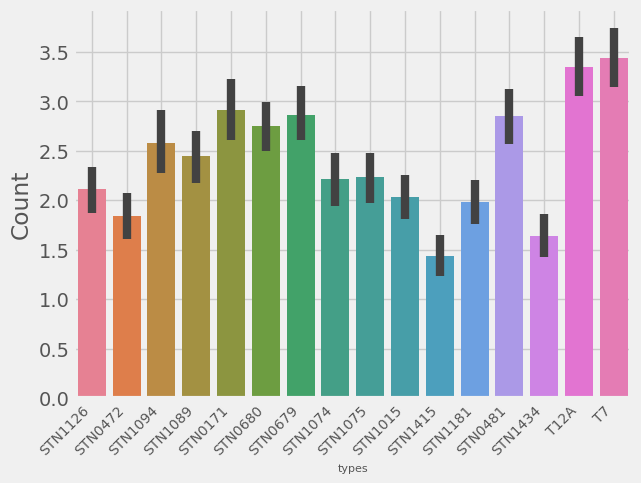

In [30]:
#เปลี่ยนสไตล์ให้อ่านง่ายขึ้น
#กราฟนี้เเสดงจำนวน count ทั้งหมดของเเต่ละ column
#หน่วย เเกน Y คูณ 100 (เเสดงถึงขำนวนรวมทั้งหมดของ เเต่ละ column)
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

#sns กราฟเเท่ง
sns.barplot(data= df)

plt.xlabel('types', fontsize = 8)
plt.ylabel('Count')
plt.grid(True)
_ = plt.xticks(rotation = 45, fontsize=10, ha = 'right')  

In [47]:
#กรองข้อมูลให้อยู่ในช่วงปี 2013-2023 ของสถานที STN1126
df_STN1126 = df[df['Date'].dt.year.between(2013, 2023)]


In [51]:
# Filter data for the years 2013 to 2023
df_subset = df[df['Year'].astype(int).between(2013, 2023)]

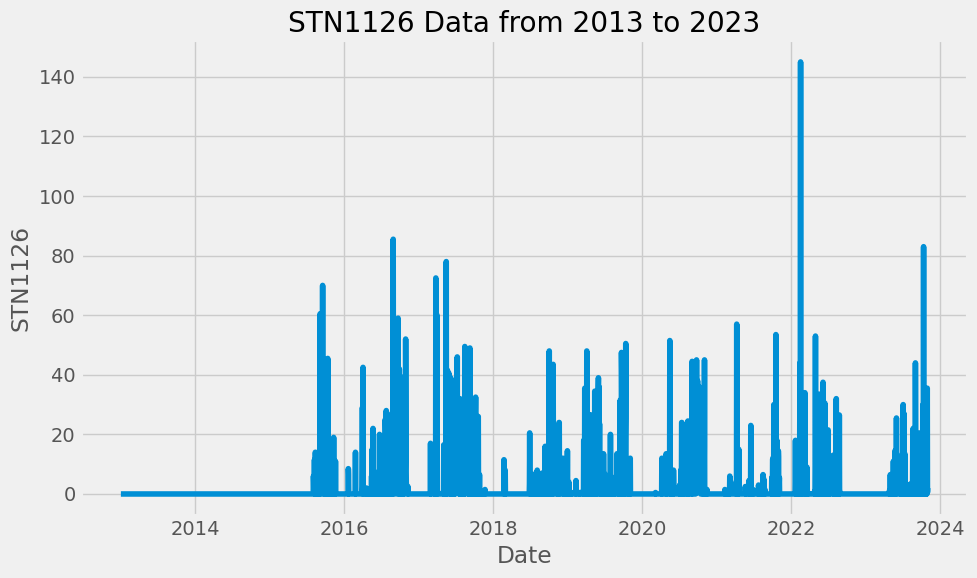

In [49]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Use Seaborn's lineplot to plot STN1126 over Date
sns.lineplot(data=df_subset, x=pd.to_datetime(df_subset['Date']), y='STN1126')

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('STN1126')
plt.title('STN1126 Data from 2013 to 2023')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

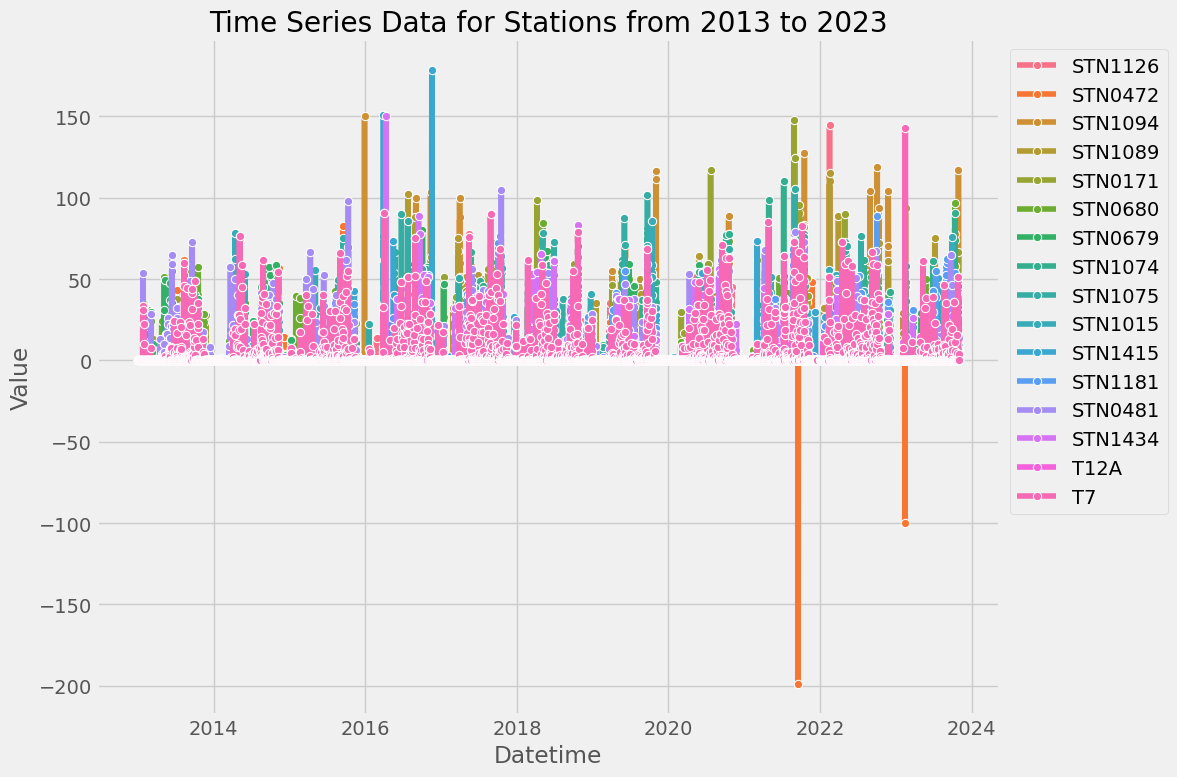

In [35]:
# Filter data for the years 2013 to 2023
df_subset = df[df['Year'].astype(int).between(2013, 2023)]

# Select the columns of interest (stations)
stations = ['STN1126', 'STN0472', 'STN1094', 'STN1089', 'STN0171', 'STN0680', 
            'STN0679', 'STN1074', 'STN1075', 'STN1015', 'STN1415', 'STN1181', 
            'STN0481', 'STN1434', 'T12A', 'T7']

# Set figure size
plt.figure(figsize=(12, 8))

# Define custom color palette
colors = sns.color_palette("husl", len(stations))

# Plot each station with custom styles
for i, station in enumerate(stations):
    sns.lineplot(data=df_subset, x='Date', y=station, label=station, color=colors[i], linestyle='-', marker='o',)

# Customize labels and title
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Time Series Data for Stations from 2013 to 2023')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

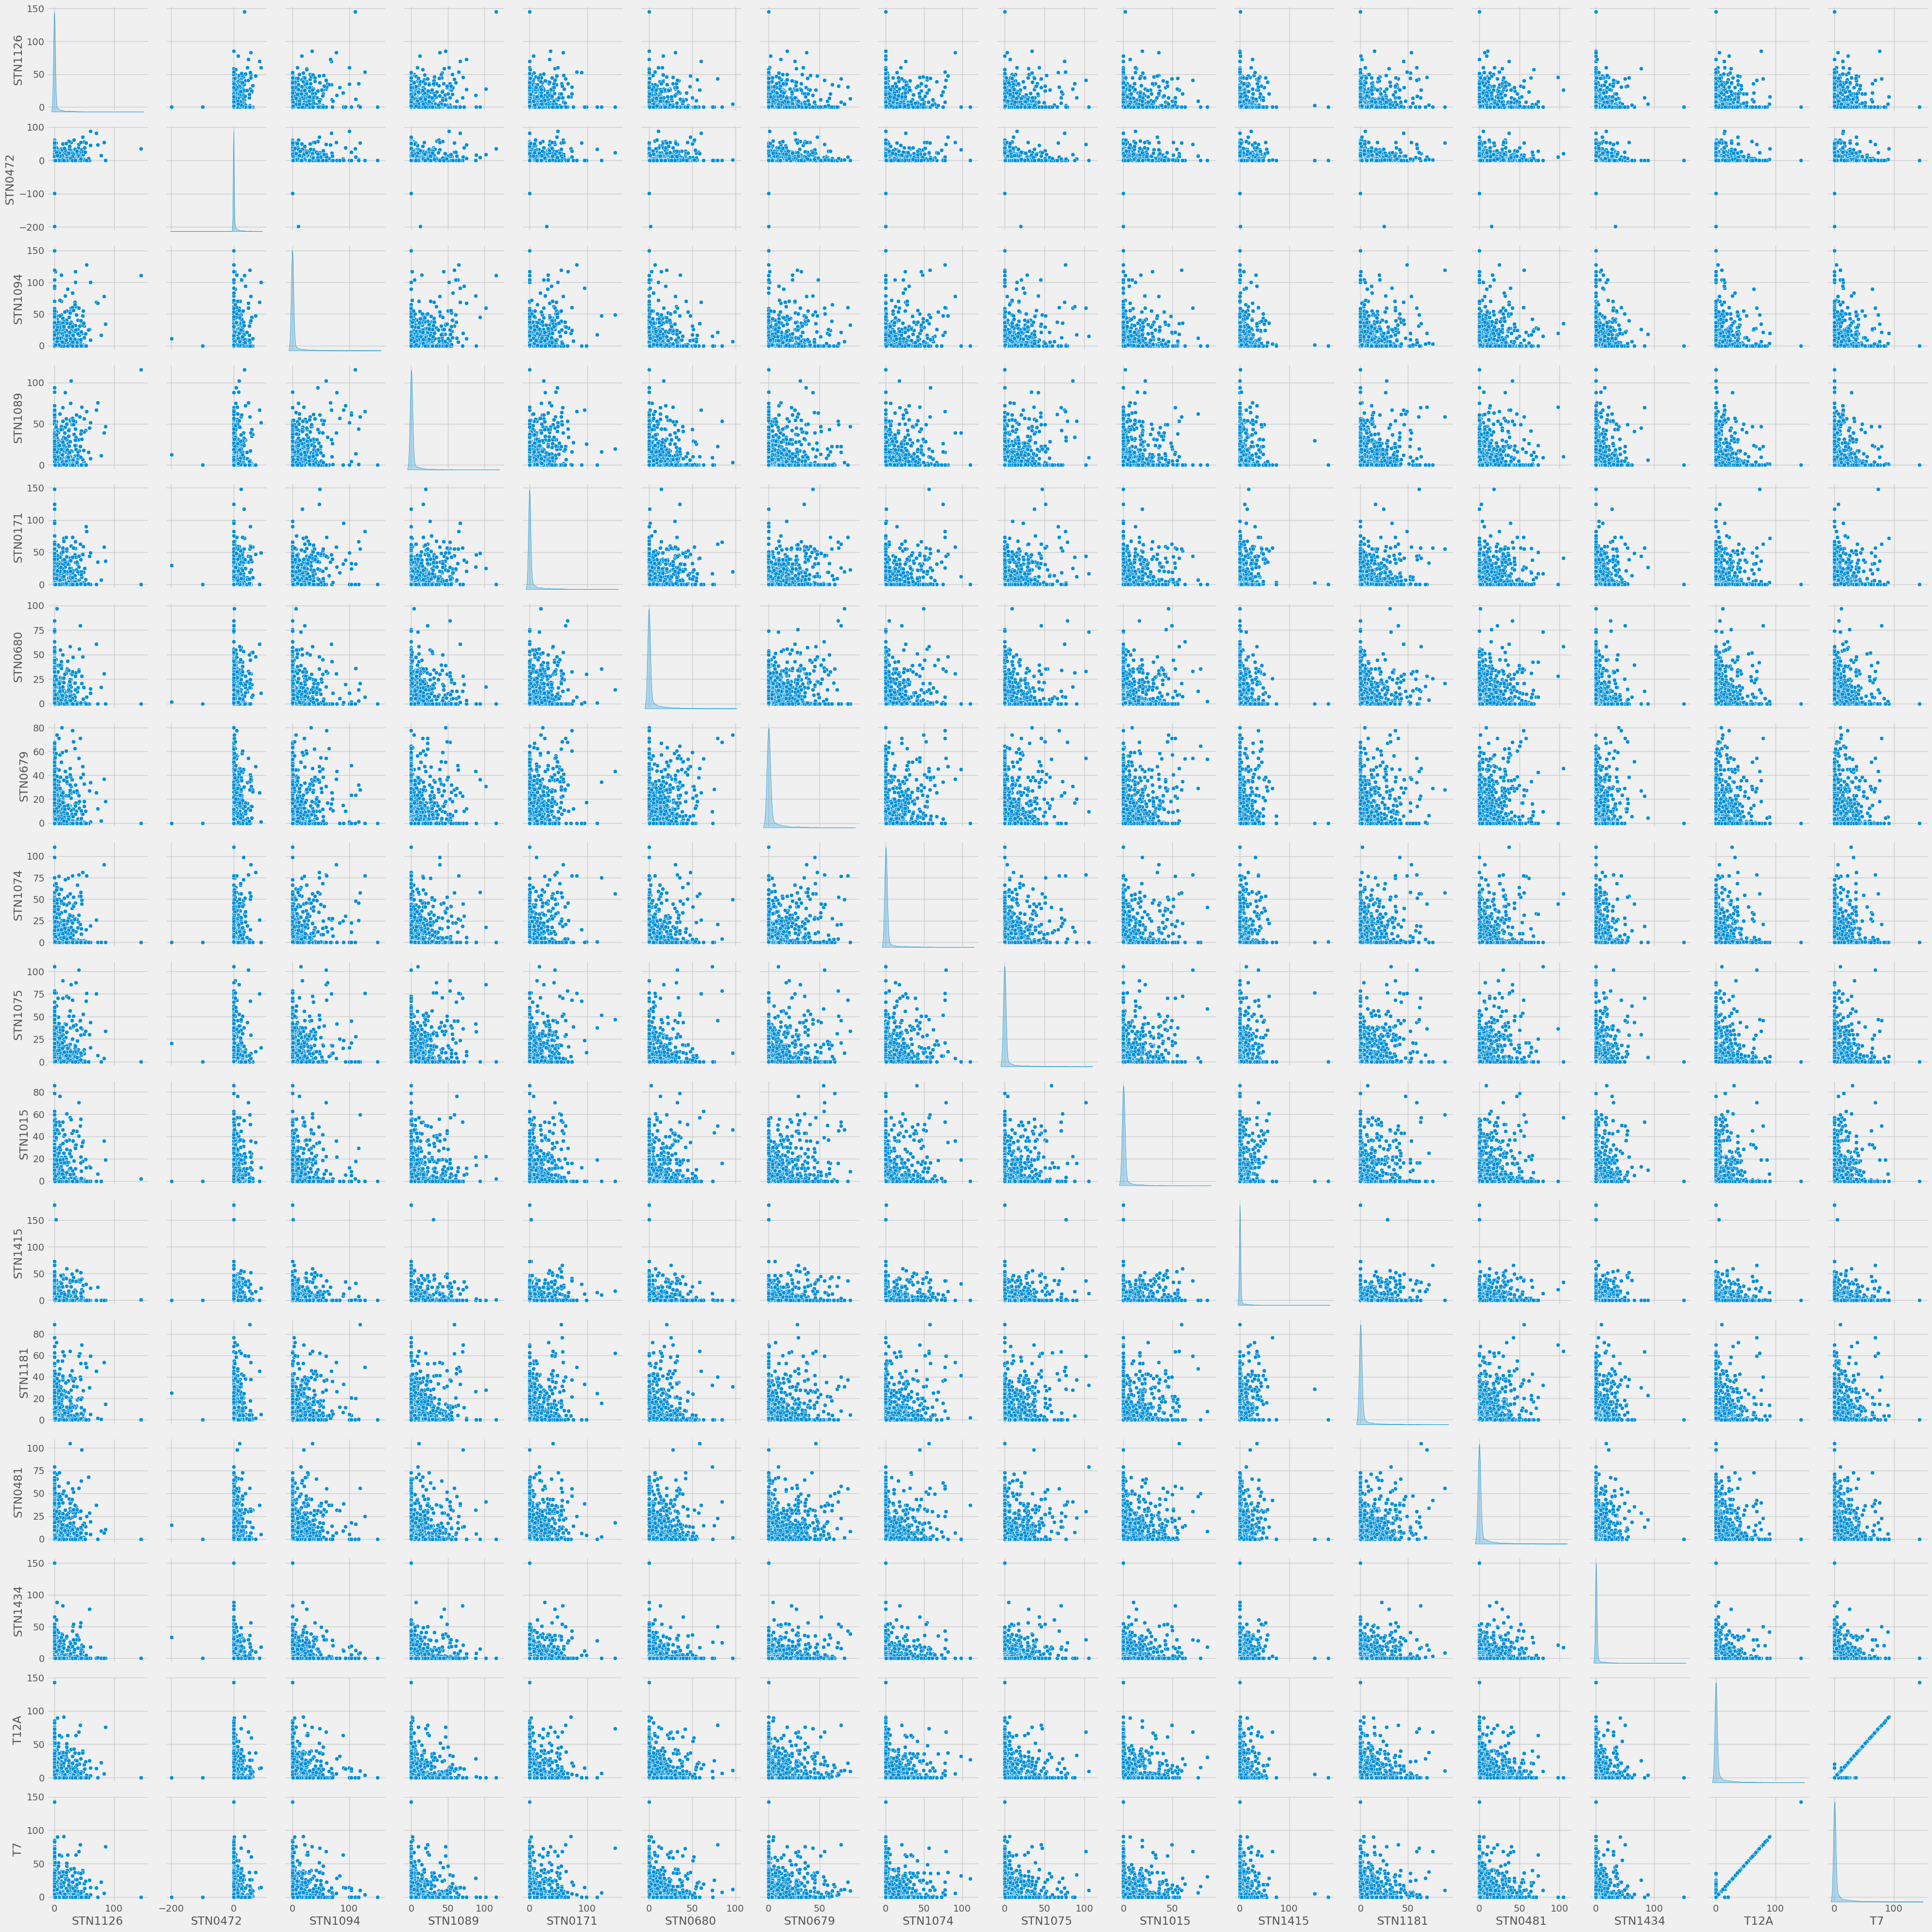

In [36]:
# เลือก columns ของสถานีต่างๆ (stations)
stations = ['STN1126', 'STN0472', 'STN1094', 'STN1089', 'STN0171', 'STN0680', 
            'STN0679', 'STN1074', 'STN1075', 'STN1015', 'STN1415', 'STN1181', 
            'STN0481', 'STN1434', 'T12A', 'T7']

# Create a pairplot
pairplot = sns.pairplot(df_subset[stations], diag_kind='kde')

# Adjust the layout จัดเรียง
plt.tight_layout()

# save ส่งเป็นรูป
#pairplot.savefig('pairplot.png') #comment ออกเพื่อ save รูป

# Show plot
plt.show()

# Forecast